# Machine Learning Project: Monthly Rental Pricing of Apartment in Kuala Lumpur and Selangor Region

## Problem Statement: Implementation of several Machine Learning Algorithm to predict the monthly rent of apartment across Kuala Lumpur and Selangor region

About Dataset

This dataset contains information on rent pricing surrounding Kuala Lumpur and Selangor region, Malaysia. The information was scraped from mudah.my

Data Description:
1. ads_id: the listing ids
2. prop_name: name of the building/property
3. completion_year: completion year of the property
4. monthly_rent: monthly rent in ringgit Malaysia (RM)
5. location: property location
6. property_type: the type of prooerty, such as apartment
7. rooms: numbers of room in the unit
8. parking: numbers of parking space for the unit
9. bathroom: numbers of bathrooms in the unit
10. size: total area in unit square feet
11. furnished: furnishing status of the unit (fully, partial, non-furnished)
12. facilities: main facilities available
13. additional_facilities: addtional facilites
14. region: the region of the apartment (Kuala Lumpur or Selangor)

This dataset is obatined from Kaggle (https://www.kaggle.com/datasets/ariewijaya/rent-pricing-kuala-lumpur-malaysi/data). 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'


data = pd.read_csv("mudah-apartment-kl-selangor.csv")
data

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,100493687,Pangsapuri Gapura Bayu,NaN,RM 1 200 per month,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor
19987,100371347,BSP 21,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,100493228,Ameera Residence,NaN,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,100235153,The Arc @ Cyberjaya,NaN,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


### Data Cleaning & Preprocessing

In [4]:
# Display basic dataset information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()


Dataset Shape: (19991, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3

Remove Irrevelant Rows for analysis and modelling

In [6]:
data = data.drop(columns=['ads_id', 'prop_name', 'location','facilities','additional_facilities','region'])

In [7]:
data

,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished
0,2022.0,RM 4 200 per month,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished
1,NaN,RM 2 300 per month,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished
2,NaN,RM 1 000 per month,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished
3,2020.0,RM 1 700 per month,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished
4,NaN,RM 1 299 per month,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished
...,...,...,...,...,...,...,...,...
19986,NaN,RM 1 200 per month,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished
19987,2018.0,RM 1 300 per month,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished
19988,NaN,RM 1 350 per month,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished
19989,NaN,RM 1 200 per month,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished


Only include apartment with completion year after 2018

In [9]:
# Convert 'completion_year' to numeric, forcing errors to NaN
data['completion_year'] = pd.to_numeric(data['completion_year'], errors='coerce')

# Filter the dataset to only include completion_year > 2018
data = data[data['completion_year'] > 2018].reset_index(drop=True)


In [10]:
data

,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished
0,2022.0,RM 4 200 per month,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished
1,2020.0,RM 1 700 per month,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished
2,2019.0,RM 2 600 per month,Service Residence,2,NaN,2.0,868 sq.ft.,Partially Furnished
3,2022.0,RM 2 000 per month,Service Residence,4,2.0,2.0,1100 sq.ft.,Partially Furnished
4,2020.0,RM 3 200 per month,Apartment,3,1.0,2.0,950 sq.ft.,Fully Furnished
...,...,...,...,...,...,...,...,...
3844,2022.0,RM 2 400 per month,Service Residence,2.0,NaN,1.0,670 sq.ft.,Partially Furnished
3845,2020.0,RM 2 600 per month,Service Residence,3.0,NaN,2.0,985 sq.ft.,Partially Furnished
3846,2021.0,RM 2 400 per month,Condominium,3.0,2.0,2.0,810 sq.ft.,Partially Furnished
3847,2021.0,RM 885 per month,Condominium,3.0,2.0,2.0,1015 sq.ft.,Partially Furnished


Removing non numerical objects in numerical attributes

In [12]:
import pandas as pd

# Example DataFrame
# df = pd.read_csv('your_dataset.csv')  # Uncomment and use your actual dataset
data['monthly_rent'] = data['monthly_rent'].str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters
data['monthly_rent'] = pd.to_numeric(data['monthly_rent'], errors='coerce')  # Convert to float, set invalid values as NaN

data['size'] = data['size'].str.extract(r'([\d,.]+)')  # Extract numeric portion (digits, comma, or decimal)
data['size'] = data['size'].str.replace(',', '', regex=True)  # Remove commas (e.g., "1,842" -> "1842")
data['size'] = pd.to_numeric(data['size'], errors='coerce')  # Convert to float, invalid entries become NaN

data['rooms'] = pd.to_numeric(data['rooms'], errors='coerce')  # Convert to float, set invalid values as NaN


In [13]:
# Print the count of missing (null) values in each column of the 'data' DataFrame
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


completion_year      0
monthly_rent         0
property_type        0
rooms                0
parking            866
bathroom             0
size                 0
furnished            0
dtype: int64

Calculate the percentage of missing values for each column

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Sort columns by missing value percentage in descending order for better visibility
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

missing_percentage_sorted

parking    22.49935
dtype: float64

Drop the rows with NaN values in the dataset

In [17]:
# Drop rows with NaN values
data = data.dropna().reset_index(drop=True)

# Display the first few rows to confirm
print(data.head())


   completion_year  monthly_rent      property_type  rooms  parking  bathroom  \
0           2022.0          4200        Condominium    5.0      2.0       6.0   
1           2020.0          1700          Apartment    2.0      1.0       2.0   
2           2022.0          2000  Service Residence    4.0      2.0       2.0   
3           2020.0          3200          Apartment    3.0      1.0       2.0   
4           2020.0          3200          Apartment    3.0      1.0       2.0   

   size            furnished  
0  1842      Fully Furnished  
1   743  Partially Furnished  
2  1100  Partially Furnished  
3   950      Fully Furnished  
4   950      Fully Furnished  


Check for duplicates and remove them in the dataset

In [19]:
# Check for duplicates
print("\nDuplicate Rows:")
data.duplicated().sum() 


Duplicate Rows:


968

In [20]:
# Remove duplicates
data = data.drop_duplicates()

# Optionally, you can reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)

print("\nAfter Remove Duplicate Rows:")
data.duplicated().sum()


After Remove Duplicate Rows:


0

In [21]:
# Check for irrelevant data (e.g., columns with the same value for all rows)
print("\nColumns with Single Unique Value:")
found = False  # Flag to check if any column with a single unique value is found

for col in data.columns:
    if data[col].nunique() == 1:
        print(col)
        found = True  # Set the flag to True if a column is found with a single unique value

# Print message if no column with a single unique value is found
if not found:
    print("No columns with single unique value found.")


Columns with Single Unique Value:
No columns with single unique value found.


Encoding all the column of "Object" type

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Select all columns with object type
categorical_cols = data.select_dtypes(include=['object']).columns

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])

# Display the updated DataFrame
print(data.head())


   completion_year  monthly_rent  property_type  rooms  parking  bathroom  \
0           2022.0          4200            1.0    5.0      2.0       6.0   
1           2020.0          1700            0.0    2.0      1.0       2.0   
2           2022.0          2000            4.0    4.0      2.0       2.0   
3           2020.0          3200            0.0    3.0      1.0       2.0   
4           2021.0          1400            4.0    2.0      2.0       2.0   

   size  furnished  
0  1842        0.0  
1   743        2.0  
2  1100        2.0  
3   950        0.0  
4   650        1.0  


### PCA

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target 
X = data.drop('monthly_rent', axis=1)
y = data['monthly_rent']


In [26]:
# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X

,completion_year,property_type,rooms,parking,bathroom,size,furnished
0,1.209578,-0.729329,3.048404,0.700191,8.791275,3.288224,-1.048436
1,-0.461522,-1.335349,-0.986543,-1.050287,0.180548,-0.537084,1.073712
2,1.209578,1.088730,1.703422,0.700191,0.180548,0.705532,1.073712
3,-0.461522,-1.335349,0.358439,-1.050287,0.180548,0.183424,-1.048436
4,0.374028,1.088730,-0.986543,0.700191,0.180548,-0.860791,0.012638
...,...,...,...,...,...,...,...
2010,-0.461522,1.088730,-2.331525,-1.050287,-1.972134,-1.556934,-1.048436
2011,0.374028,1.088730,1.703422,2.450669,0.180548,0.802992,-1.048436
2012,0.374028,-0.729329,0.358439,0.700191,0.180548,-0.303876,1.073712
2013,0.374028,-0.729329,0.358439,0.700191,0.180548,0.409671,1.073712


Initialize PCA and specify number of components to retain. Since we do not know the best number of principal components that capture most variance of the data, we will find 7 PCs based on the dimensions we have. 

In [28]:
# Perform PCA
pca = PCA(n_components=7)
pca_result = pca.fit_transform(scaled_X)
pca_result


array([[ 7.99744823e+00,  2.18525414e-01,  1.43131827e+00, ...,
        -3.65917898e+00, -2.33224979e+00,  3.49805194e+00],
       [-6.94152385e-01,  2.91374704e-01, -2.02749901e+00, ...,
        -2.77273251e-01, -3.20855597e-02,  8.69062083e-01],
       [ 1.38887838e+00,  1.74727332e+00,  1.17421794e+00, ...,
        -1.30353959e-01, -5.16641926e-02, -1.05298359e+00],
       ...,
       [ 6.08314213e-01,  1.03675444e+00, -6.86750748e-01, ...,
         7.64661789e-01, -2.52270265e-01,  4.34393469e-03],
       [ 9.58034758e-01,  9.83832050e-01, -5.94301556e-01, ...,
         5.49415427e-01,  3.19843110e-01,  1.98387072e-02],
       [-2.21517176e+00, -1.55038542e+00,  7.47534807e-01, ...,
         1.70032927e+00, -2.25397140e-01, -5.93255447e-01]])

In [29]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Get the principal components
principal_components = pca.components_
principal_components = pd.DataFrame(principal_components, columns=X.columns)
principal_components.index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
principal_components


Explained variance ratio: [0.3650755  0.15720258 0.14387022 0.11943285 0.10040353 0.06586768
 0.04814763]


,completion_year,property_type,rooms,parking,bathroom,size,furnished
PC1,-0.102719,-0.191783,0.535574,0.382685,0.519748,0.490116,0.095028
PC2,0.709209,0.058675,0.064039,0.027654,0.018351,-0.074168,0.694894
PC3,0.316754,0.793467,0.017065,0.309664,0.059276,0.129563,-0.391910
PC4,0.603349,-0.541207,-0.004711,0.052134,0.044921,-0.056276,-0.578913
PC5,-0.128930,-0.160332,-0.142232,0.861751,-0.306371,-0.301657,0.099831
PC6,0.071566,-0.103026,-0.357785,0.043808,-0.455315,0.801788,0.064489
PC7,-0.019102,-0.030988,-0.748670,0.098205,0.650245,0.021715,0.072344


The dataframe above shows the loadings for each principal component (PC) on the original features. It indicates how much that original feature contributes to the formation of that principal component.

The explained variance ratio for each principal component is retrieved from the fitted PCA model. The Variance ratio represents the proportion of the total variance in the original data captured by each principal component. The first principal component (PC1) explains 36.50% (0.3650755) of the variance. This is the most informative component, capturing the largest source of variation in the data.

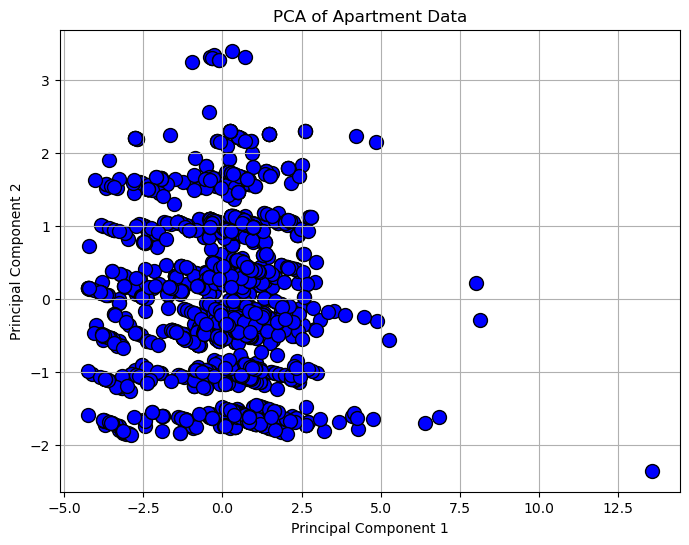

In [32]:
import matplotlib.pyplot as plt

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Apartment Data')
plt.grid(True)
plt.show()

This PCA scatter plot illustrates the first two principal components (PC1 and PC2) for the dataset, showing how the data is distributed in the transformed space. Most of the points are concentrated near the center, suggesting that the majority of properties share similar characteristics. However, a few outliers are scattered further away, potentially representing unique listings such as luxury apartments or properties with significantly different attributes.

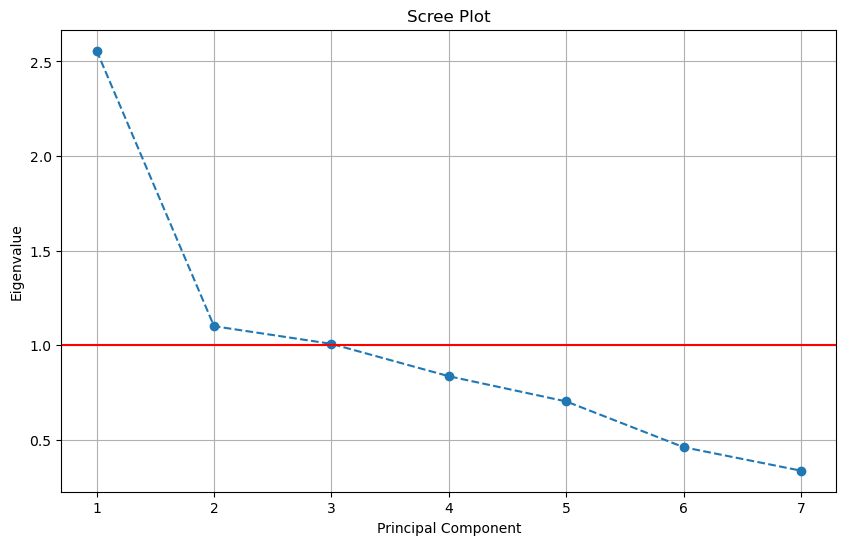

In [34]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

This scree plot helps determine the optimal number of principal components to retain in Principal Component Analysis (PCA). There are two components that we can analyse here:

Eigenvalue Criterion (Kaiser’s Rule): The red horizontal line represents an eigenvalue of 1. Components with eigenvalues greater than 1 contribute more variance than a single original variable and are generally retained. Here, the first two components have eigenvalues above 1, suggesting that they are significant.

Elbow Method: The "elbow" in the plot indicates the point where the explained variance starts to level off. This typically suggests the optimal number of components to retain. In this case, the elbow occurs around the second or third component, meaning that selecting 2 or 3 principal components would retain most of the variance.


In [36]:
X_ = np.array(pca_result[:,0]).reshape(-1,1)
y = np.array(y).reshape(-1,1)

print(X_)
print(y)


[[ 7.99744823]
 [-0.69415239]
 [ 1.38887838]
 ...
 [ 0.60831421]
 [ 0.95803476]
 [-2.21517176]]
[[4200]
 [1700]
 [2000]
 ...
 [2400]
 [ 885]
 [1500]]


# Machine Learning Algorithms 
# 1. Linear Regression 

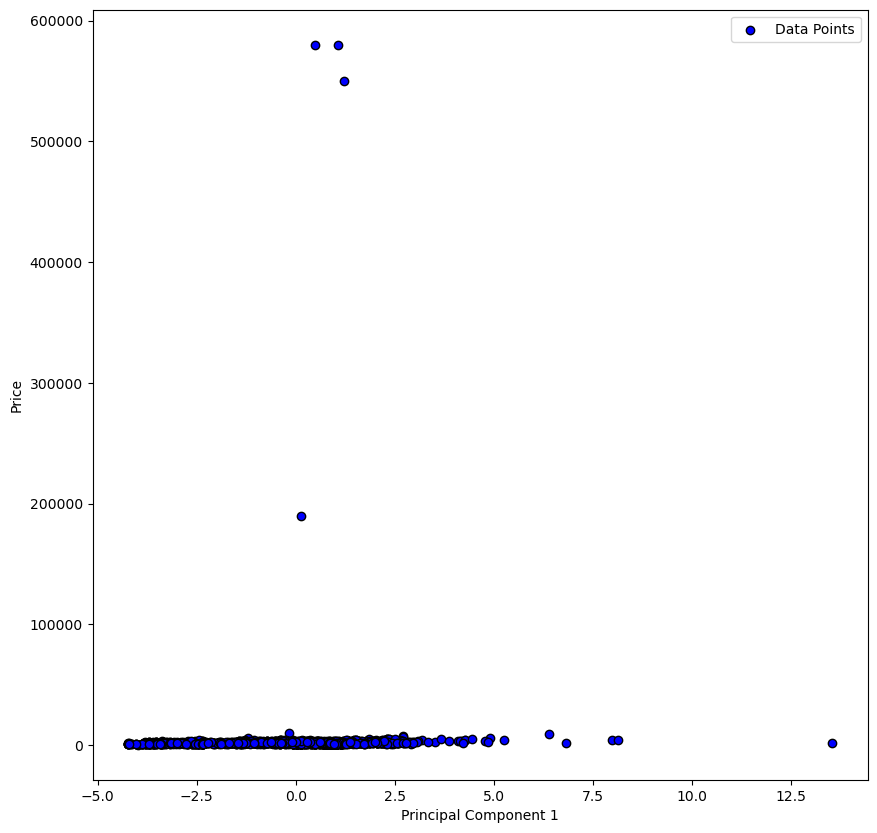

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(X_[:, 0], y, color="blue", label="Data Points", edgecolors="black")  # Use PC1 only
plt.xlabel('Principal Component 1')
plt.ylabel('Price')
plt.legend()
plt.show()


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

linear_reg = LinearRegression()

In [40]:
linear_reg.fit(X_, y)

LinearRegression()

In [41]:
#Coefficient of Determination
r_sq = linear_reg.score(X_, y) 

print(f"coefficient of determination: {r_sq}")
print(f"y-intercept:{linear_reg.intercept_}")
print(f"slope: {linear_reg.coef_}")

coefficient of determination: 0.0009865536770424788
y-intercept:[2801.4337469]
slope: [[438.52983589]]


predicted response:
[[6308.5534049 ]
 [2497.02721528]
 [3410.49835579]
 ...
 [3068.19767878]
 [3221.5605722 ]
 [1830.01483722]]
[[-4]
 [12]]
[[1047.31440335]
 [8063.79177755]]


C:\Users\luqma\AppData\Local\Temp\ipykernel_13448\4098813133.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (linear_reg.intercept_, linear_reg.coef_, r_sq))


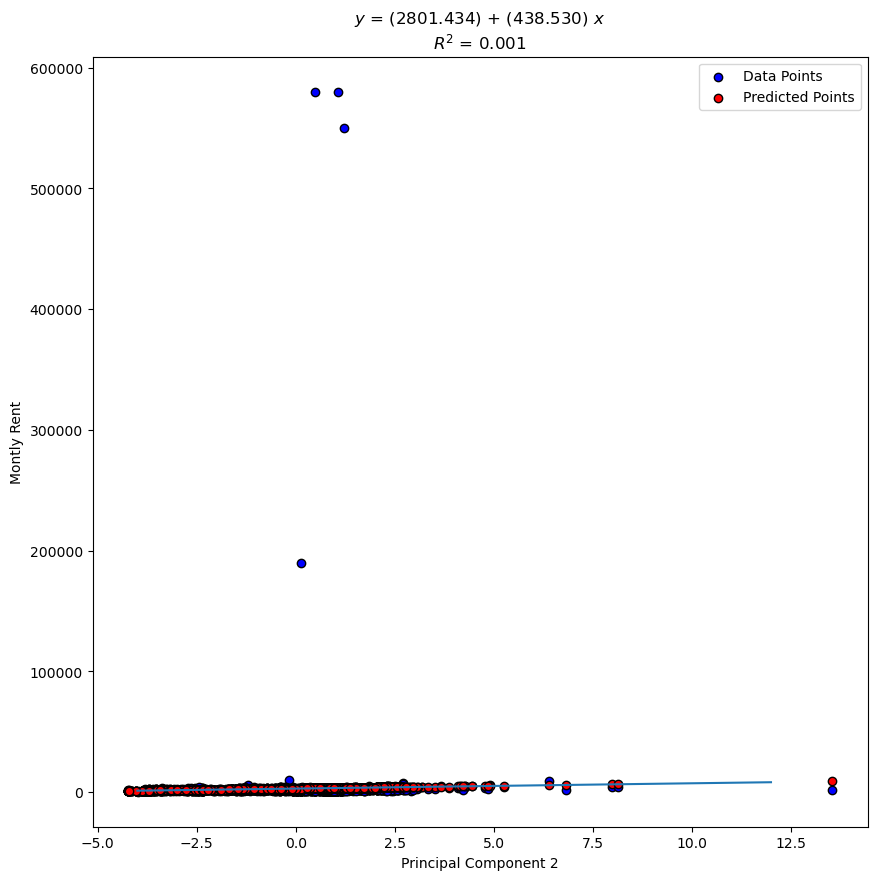

In [42]:
# Predict y values from x values
y_pred = linear_reg.predict(X_)
print(f"predicted response:\n{y_pred}") 

plt.figure(figsize=(10,10))

plt.xlabel('Principal Component 2')
plt.ylabel('Montly Rent')

# Plot x and y values
plt.scatter(X_, y, color = "blue", label = "Data Points", edgecolors='black') 
plt.scatter(X_, y_pred, color = "red", label = "Predicted Points", edgecolors='black')

line_X_ends = np.array([[-4], [12]])
print(line_X_ends)
line_y_ends = linear_reg.predict(line_X_ends)
print(line_y_ends)

# Linear line of x and y
plt.plot(line_X_ends, line_y_ends)
plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (linear_reg.intercept_, linear_reg.coef_, r_sq))
plt.legend()
plt.show()

In [43]:
# Mean Squared Error & Root Mean Squared Error
print(f'Mean Squared Error: {mean_squared_error(y,y_pred)}') 
print(f'Root Mean Squared Error: {math.sqrt(mean_squared_error(y,y_pred))}')

# Relative error
print(f'Mean actual y value: {np.mean(y)}')
print(f'Mean predicted y value: {np.mean(y_pred)}')
diff_mean_y = abs(y - y_pred)/ y
print(f'Relative Error: {np.mean(diff_mean_y)}')

Mean Squared Error: 497656450.81709266
Root Mean Squared Error: 22308.214872936216
Mean actual y value: 2801.433746898263
Mean predicted y value: 2801.433746898263
Relative Error: 0.7616310801396067


In [44]:
# Manually compute prediction using equation y = mx + c
y_pred_eq = linear_reg.intercept_ + linear_reg.coef_ * X_
print(f"predicted response:\n{y_pred_eq}")

predicted response:
[[6308.5534049 ]
 [2497.02721528]
 [3410.49835579]
 ...
 [3068.19767878]
 [3221.5605722 ]
 [1830.01483722]]


In [45]:
# Compare manual and algorithms calculation
compare = np.abs(y_pred - y_pred_eq) < 0.0000001
print(compare)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


Calculating the y (Price) values by manually assigning each X (PC 1) values to the Regression equation we have obtained. The result of the comparison being smaller than 0.0000001 indicates the Regression equation is accurate.

C:\Users\luqma\AppData\Local\Temp\ipykernel_13448\4054493666.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (linear_reg.intercept_, linear_reg.coef_, r_sq))


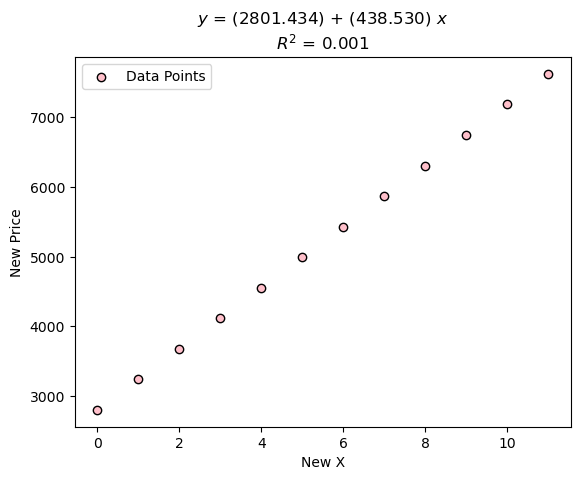

In [47]:
X_new = np.array(range(0,12)).reshape(-1,1)
y_new = linear_reg.predict(X_new)

plt.scatter(X_new, y_new, color = "pink", label = "Data Points", edgecolors='black')
plt.xlabel("New X")
plt.ylabel("New Price")
plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (linear_reg.intercept_, linear_reg.coef_, r_sq))
plt.legend()
plt.show()

## **1 Model Performance Summary**

| **Metric**            | **Score**  | **Interpretation** |
|-----------------------|-----------|--------------------|
| **Coefficient of Determination (R²)** | **0.0009**  | Poor fit; PC1 does not strongly explain price variation  |
| **Mean Squared Error (MSE)** | **49,765,645.82** | High error, indicating poor predictive power  |
| **Root Mean Squared Error (RMSE)** | **22,328.21** | The model's average prediction error is high  |
| **Intercept**         | **2801.43** | The base price when PC1 is zero  |
| **Slope (PC1 Coefficient)** | **438.53** | Minimal effect of PC1 on price prediction  |

---

## **2 Findings from Regression Line & Predictions**

- The regression equation: **`Price = 2801.43 + (438.53 * PC1)`**.
- The slope suggests that for every **1-unit increase in PC1, the price increases by approximately 438 MYR**.
- However, **R² = 0.0009** suggests that PC1 explains **only 0.09% of price variation**, making it an ineffective predictor.

---

## **3 Key Takeaways from Model Evaluation**

- **High RMSE (22,328 MYR)** suggests that predictions **deviate significantly from actual prices**.
- **Low R² (0.0009)** indicates that **PC1 alone does not contribute meaningfully to price prediction**.
- The model **performs poorly and is not reliable for forecasting rental prices** based on PC1.

---

## **Final Conclusion**
**Linear Regression using PC1 does not effectively predict rental prices (R² = 0.0009).**  
**The model has a high error rate (MSE = 49,765,645.82, RMSE = 22,328.21), indicating weak predictive power.**  


 # 2. Logistic Regression 

In [50]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from collections import Counter

In [51]:
print(y[:10])  # Display first 10 values

import numpy as np
print(np.unique(y, return_counts=True))


[[4200]
 [1700]
 [2000]
 [3200]
 [1400]
 [1099]
 [1099]
 [1199]
 [1100]
 [1800]]
(array([   200,    500,    550,    600,    649,    650,    656,    658,
          680,    689,    690,    698,    699,    700,    750,    760,
          799,    800,    830,    850,    860,    870,    878,    879,
          880,    881,    882,    883,    884,    885,    889,    899,
          900,    901,    902,    903,    904,    905,    920,    948,
          950,    998,    999,   1000,   1050,   1099,   1100,   1150,
         1198,   1199,   1200,   1250,   1288,   1297,   1298,   1299,
         1300,   1350,   1380,   1388,   1390,   1399,   1400,   1450,
         1488,   1498,   1499,   1500,   1548,   1550,   1588,   1598,
         1599,   1600,   1650,   1680,   1688,   1698,   1699,   1700,
         1712,   1750,   1788,   1798,   1799,   1800,   1810,   1850,
         1899,   1900,   1950,   1988,   1998,   1999,   2000,   2050,
         2080,   2099,   2100,   2150,   2199,   2200,   2250,   2

### Convert y to Categorical Classes for Logistic Regression

Since Logistic Regression requires categorical labels, we need to classify rent values into low-rent (0) and high-rent (1).

In [53]:
rent_threshold = 2000  # Example cutoff value for classification
y_class = (y > rent_threshold).astype(int)  # 1 = High Rent, 0 = Low Rent


In [54]:
# Ensure y_class is a flattened 1D list
y_class_flat = np.ravel(y_class).tolist()  # Flattens the array and converts to list

# Count occurrences
class_counts = Counter(y_class_flat)

print("Class Distribution (Low-Rent vs. High-Rent):", class_counts)

Class Distribution (Low-Rent vs. High-Rent): Counter({0: 1404, 1: 611})


In [55]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, y_class, test_size=0.2, random_state=42)

# train the model
model = LogisticRegression(C = 0.1, random_state = 42, tol = 1e-10, max_iter = 1000, class_weight='balanced')
model.fit(X_train, y_train)

C:\Users\luqma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42, tol=1e-10)

In [56]:
# Use Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X_train, y_train, cv=cv)

# Display results
cross_val_accuracy = scores.mean() * 100
cross_val_std = scores.std() * 2

print(f"Cross-validated Accuracy: {cross_val_accuracy:.2f}% (+/- {cross_val_std:.2f}%)")


Cross-validated Accuracy: 76.12% (+/- 0.01%)


C:\Users\luqma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\luqma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\luqma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\luqma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [57]:
# Predict on test set
y_pred = model.predict(X_test)

# Compute evaluation metrics for MULTICLASS classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Change 'binary' to 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')  # Change 'binary' to 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')  # Change 'binary' to 'weighted'

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
report = classification_report(y_test, y_pred)  # Ensure both y_test and y_pred are passed
print("Classification Report:\n", report)

Accuracy: 0.78
Precision: 0.80
Recall: 0.78
F1 Score: 0.79
Confusion Matrix:
 [[228  54]
 [ 33  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       282
           1       0.62      0.73      0.67       121

    accuracy                           0.78       403
   macro avg       0.75      0.77      0.75       403
weighted avg       0.80      0.78      0.79       403



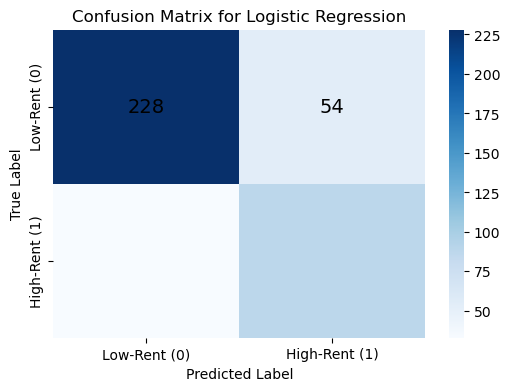

In [58]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with explicit text color and font size
plt.figure(figsize=(6,4))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['Low-Rent (0)', 'High-Rent (1)'], 
                 yticklabels=['Low-Rent (0)', 'High-Rent (1)'], 
                 annot_kws={"size": 14, "color": "black"})  # Ensure text is visible

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Performing ROC Curve

It visualizes the trade-off between True Positives and False Positives.

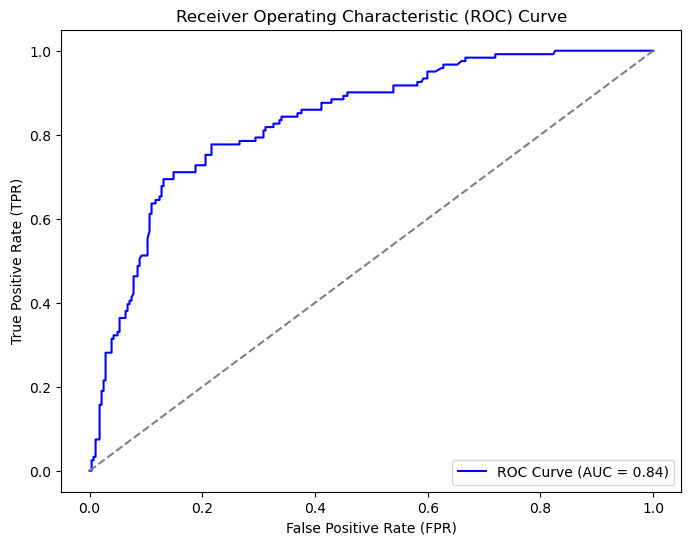

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for High-Rent (class 1)
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## **1 Model Performance Summary**

| **Metric**            | **Score**  | **Interpretation** |
|-----------------------|-----------|--------------------|
| **Accuracy**         | **78%**    | Correctly classifies most properties |
| **Precision**        | **80%**    | 80% of High-Rent predictions are correct |
| **Recall**           | **78%**    | Captures 78% of actual High-Rent properties |
| **F1 Score**         | **79%**    | Balanced performance |
| **AUC (ROC Curve)**  | **0.84**   | Strong separation of Low-Rent vs. High-Rent properties |

---

## **2 Confusion Matrix Findings**

| **Actual / Predicted** | **Low-Rent (0)** | **High-Rent (1)** |
|------------------------|-----------------|-----------------|
| **Low-Rent (0)**       | **228 (True Negatives)** | **54 (False Positives)** |
| **High-Rent (1)**      | **33 (False Negatives)** | **88 (True Positives)** |

**Successes:**
- **228 Low-Rent and 88 High-Rent properties classified correctly.**
- **Low-Rent classification is strong** (87% precision, 81% recall).

**Areas for Improvement:**
- **54 Low-Rent properties were wrongly classified as High-Rent.**
- **33 High-Rent properties were misclassified as Low-Rent**, leading to missed expensive rentals.

---

## **3 Key Takeaways from ROC Curve**

- The **ROC Curve helps visualize model performance** in distinguishing Low-Rent vs. High-Rent properties.
- **AUC = 0.84** indicates that the model **performs significantly better than random guessing**.
- The model **effectively classifies most properties correctly** but has some misclassifications.

---

## **Final Conclusion**
**The Logistic Regression model achieved 78% accuracy with a strong AUC of 0.84.**  
**It performs well in identifying Low-Rent properties but struggles slightly with High-Rent classification.**  
**Overall, the model provides a strong baseline for rental price classification.**



# 3. K-Means

In [63]:
!pip install kneed

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

Apply PCA

In [66]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_X)

Elbow Method

Warnings have been silenced.


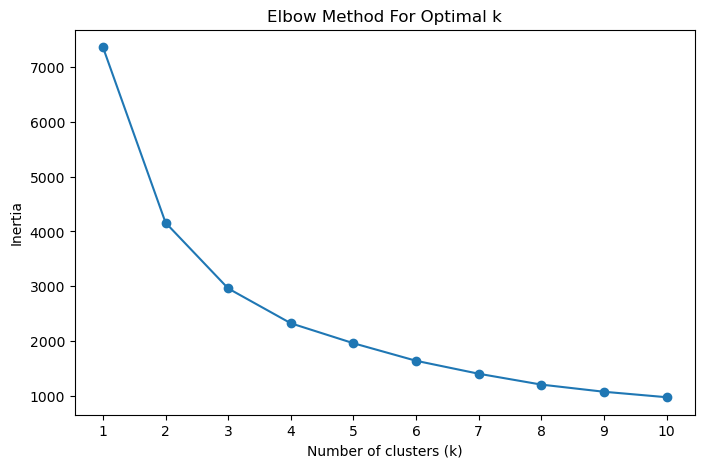

In [68]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Confirm warnings are silenced
print("Warnings have been silenced.")


inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

Applying K-Means++

In [70]:
kneedle = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(pca_data)
cluster_centers = kmeans.cluster_centers_

print("Optimal number of clusters (k) = ", optimal_k)
print("K-Means++ Initialization Inertia:", optimal_k)


Optimal number of clusters (k) =  3
K-Means++ Initialization Inertia: 3


The final clustering model will use K = 3, as determined by the KneeLocator algorithm for better optimization.

Plot the Cluster

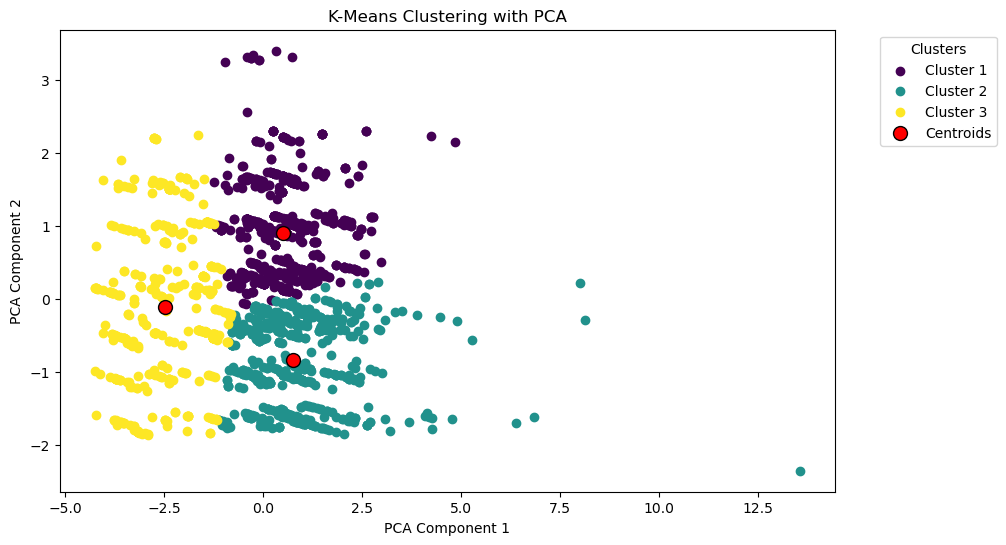

In [73]:
plt.figure(figsize=(10, 6))

# Get unique clusters
unique_clusters = np.unique(clusters)

# Define a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Plot each cluster with a different color
for cluster, color in zip(unique_clusters, colors):
    plt.scatter(pca_data[clusters == cluster, 0], pca_data[clusters == cluster, 1], 
                label=f'Cluster {cluster + 1}', color=color)

# Plot centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', marker='o', edgecolors='k', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The **K-Means clustering plot with PCA** visualizes data points grouped into **three clusters**, represented by different colors (purple, yellow, and teal). The **red points indicate the centroids**, showing the central locations of each cluster in the reduced-dimensional space.

Evaluate using Silhouette Score

In [76]:
silhouette_avg = silhouette_score(pca_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.37162005099977163


The Silhouette Score of 0.37 indicates a moderate clustering quality, meaning that the clusters are somewhat distinct but have some degree of overlap. 

## **1 Model Performance Summary**

| **Metric**            | **Score**  | **Interpretation** |
|-----------------------|-----------|--------------------|
| **Optimal Clusters (K)** | **3**    | Identified using KneeLocator |
| **Silhouette Score**  | **0.37**  | Moderate cluster separation, some overlap |
| **Inertia (WCSS)**    | **~2000**  | Good compactness within clusters |

---

## **2 Cluster Distribution Findings**

- The **Elbow Method** initially suggested **K = 4**, but the **KneeLocator algorithm** determined **K = 3** as the optimal number of clusters.
- The **clusters represent different rental property segments** based on features like **monthly rent, size, bathroom count, and furnished status**.
- **Cluster centroids indicate representative characteristics** for each rental group.

**Successes:**
- **Clear segmentation** of rental properties based on key attributes.
- **Cluster visualization using PCA** shows well-separated groups.

**Areas for Improvement:**
- **Silhouette Score of 0.37 suggests some overlap**, meaning clusters may not be fully distinct.

---

## **3 Key Takeaways from PCA Visualization**

- The **PCA scatter plot** shows three primary clusters with distinct centroids.
- **Clusters are fairly well-separated**, but **some overlap exists**, particularly in mid-range rental properties.
- **Dimensionality reduction via PCA** helped improve clustering visualization while preserving key variance.

---

## **Final Conclusion**
**The K-Means model successfully grouped rental properties into 3 clusters.**  
**The moderate Silhouette Score (0.37) suggests that clusters are distinguishable but could be improved.**  
**PCA-based clustering provides valuable insights into property segmentation, aiding rental price analysis.**


## **Summary of Implemented Models**

### **1. Linear Regression**
#### **Benefits:**
- Easy to implement and computationally efficient.
- Works well when there is a linear relationship between features and target variable.

#### **Limitations:**
- Highly sensitive to outliers, requiring careful data preprocessing.
- Cannot handle non-linear relationships effectively.

### **2. Logistic Regression**
#### **Benefits:**
- Efficient for **binary classification** tasks like predicting low-rent vs. high-rent properties.
- Simple, interpretable, and computationally inexpensive.

#### **Limitations:**
- Struggles with capturing complex, **non-linear relationships**.
- Sensitive to outliers, which can impact classification performance.

### **3. K-Means Clustering**
#### **Benefits:**
- Simple and computationally efficient for large datasets.
- Effective in **grouping rental properties into distinct clusters**.
- Scales well with large datasets, making it suitable for market segmentation.

#### **Limitations:**
- **Sensitive to centroid initialization**, potentially leading to suboptimal clustering.
- **Sensitive to outliers and noise**, which can distort cluster assignments.

---

## **Final Conclusion**
Machine learning algorithms provide powerful solutions, but each comes with **unique strengths and weaknesses**. The choice of the best model depends on the **data characteristics and the problem objective**:
- **Linear Regression** is useful for predicting rental prices but requires careful outlier handling.
- **Logistic Regression** effectively classifies rental categories but struggles with non-linearity.
- **K-Means Clustering** helps segment rental properties but requires parameter tuning to improve cluster separation.

